In [30]:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

abalone = pd.read_csv(r"D:\Study\DS\abalone.csv")

In [31]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [32]:
X = abalone.drop(['Sex'],axis=1)
y = abalone['Sex']

In [33]:
print(list(X.columns.values))

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [36]:
model1 = LogisticRegression(random_state=0,multi_class='multinomial',penalty=None,solver='newton-cg').fit(X_train,y_train)

preds = model1.predict(X_test)

params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': None, 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [37]:
print('Intercept:\n',model1.intercept_)
print('coef:\n',model1.coef_)

Intercept:
 [-1.78722182  1.04125814  0.74596368]
coef:
 [[-6.14589531  6.60723869  3.9292827   1.87255755 -2.66888789  5.98940751
  -1.50629271  0.06142569]
 [12.17937789 -6.83032097 -5.45083133 -4.22195313  2.79755394 -8.4932804
   3.0953222  -0.1223614 ]
 [-6.03348258  0.22308228  1.52154863  2.34939558 -0.12866606  2.5038729
  -1.58902949  0.0609357 ]]


In [38]:
np.exp(model1.coef_)

array([[2.14225705e-03, 7.40435620e+02, 5.08704752e+01, 6.50491180e+00,
        6.93292846e-02, 3.99178031e+02, 2.21730474e-01, 1.06335148e+00],
       [1.94731681e+05, 1.08051125e-03, 4.29273451e-03, 1.46699641e-02,
        1.64044714e+01, 2.04840198e-04, 2.20943563e+01, 8.84828535e-01],
       [2.39713121e-03, 1.24992341e+00, 4.57931138e+00, 1.04792339e+01,
        8.79267542e-01, 1.22297670e+01, 2.04123619e-01, 1.06283058e+00]])

In [39]:
import numpy as np
np.exp(model1.coef_)

array([[2.14225705e-03, 7.40435620e+02, 5.08704752e+01, 6.50491180e+00,
        6.93292846e-02, 3.99178031e+02, 2.21730474e-01, 1.06335148e+00],
       [1.94731681e+05, 1.08051125e-03, 4.29273451e-03, 1.46699641e-02,
        1.64044714e+01, 2.04840198e-04, 2.20943563e+01, 8.84828535e-01],
       [2.39713121e-03, 1.24992341e+00, 4.57931138e+00, 1.04792339e+01,
        8.79267542e-01, 1.22297670e+01, 2.04123619e-01, 1.06283058e+00]])

In [40]:
confusion_matrix(y_test,preds)

confmtrx = np.array(confusion_matrix(y_test,preds))

pd.DataFrame(confmtrx,index= ['Female','Infant','Male'], columns = ['predicted_Female', 'predicted_Infant','predicted_Male'])

,predicted_Female,predicted_Infant,predicted_Male
Female,88,44,138
Infant,15,210,35
Male,79,66,161


In [41]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score (y_test, preds))

#Create classification report
class_report=classification_report (y_test, preds)
print(class_report)

Accuracy Score: 0.5490430622009569
              precision    recall  f1-score   support

           F       0.48      0.33      0.39       270
           I       0.66      0.81      0.72       260
           M       0.48      0.53      0.50       306

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.55      0.54       836



In [42]:
logit_model = sm.MNLogit(y_train,sm.add_constant(X_train))
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.850662
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                    Sex   No. Observations:                 3341
Model:                        MNLogit   Df Residuals:                     3323
Method:                           MLE   Df Model:                           16
Date:                Sun, 15 Oct 2023   Pseudo R-squ.:                  0.2239
Time:                        17:14:48   Log-Likelihood:                -2842.1
converged:                       True   LL-Null:                       -3662.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
         Sex=I       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.8285      0.569      4.968      0.000       1.713       3.944
Length           

In [43]:
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

diamond = pd.read_csv(r"D:\Study\DS\diamonds.csv")

In [52]:
diamond

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


In [47]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Fair','Good','Ideal','Very Good','Premium'],ordered=True)

diamond['cut']=diamond['cut'].astype(cat_type)

diamond['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [48]:
diamond['volume']=diamond['x']*diamond['y']*diamond['z']

In [51]:
diamond.drop(['x','y','z'],axis=1,inplace=True)

Text(0.5, 1.0, 'Distribution of Depth')

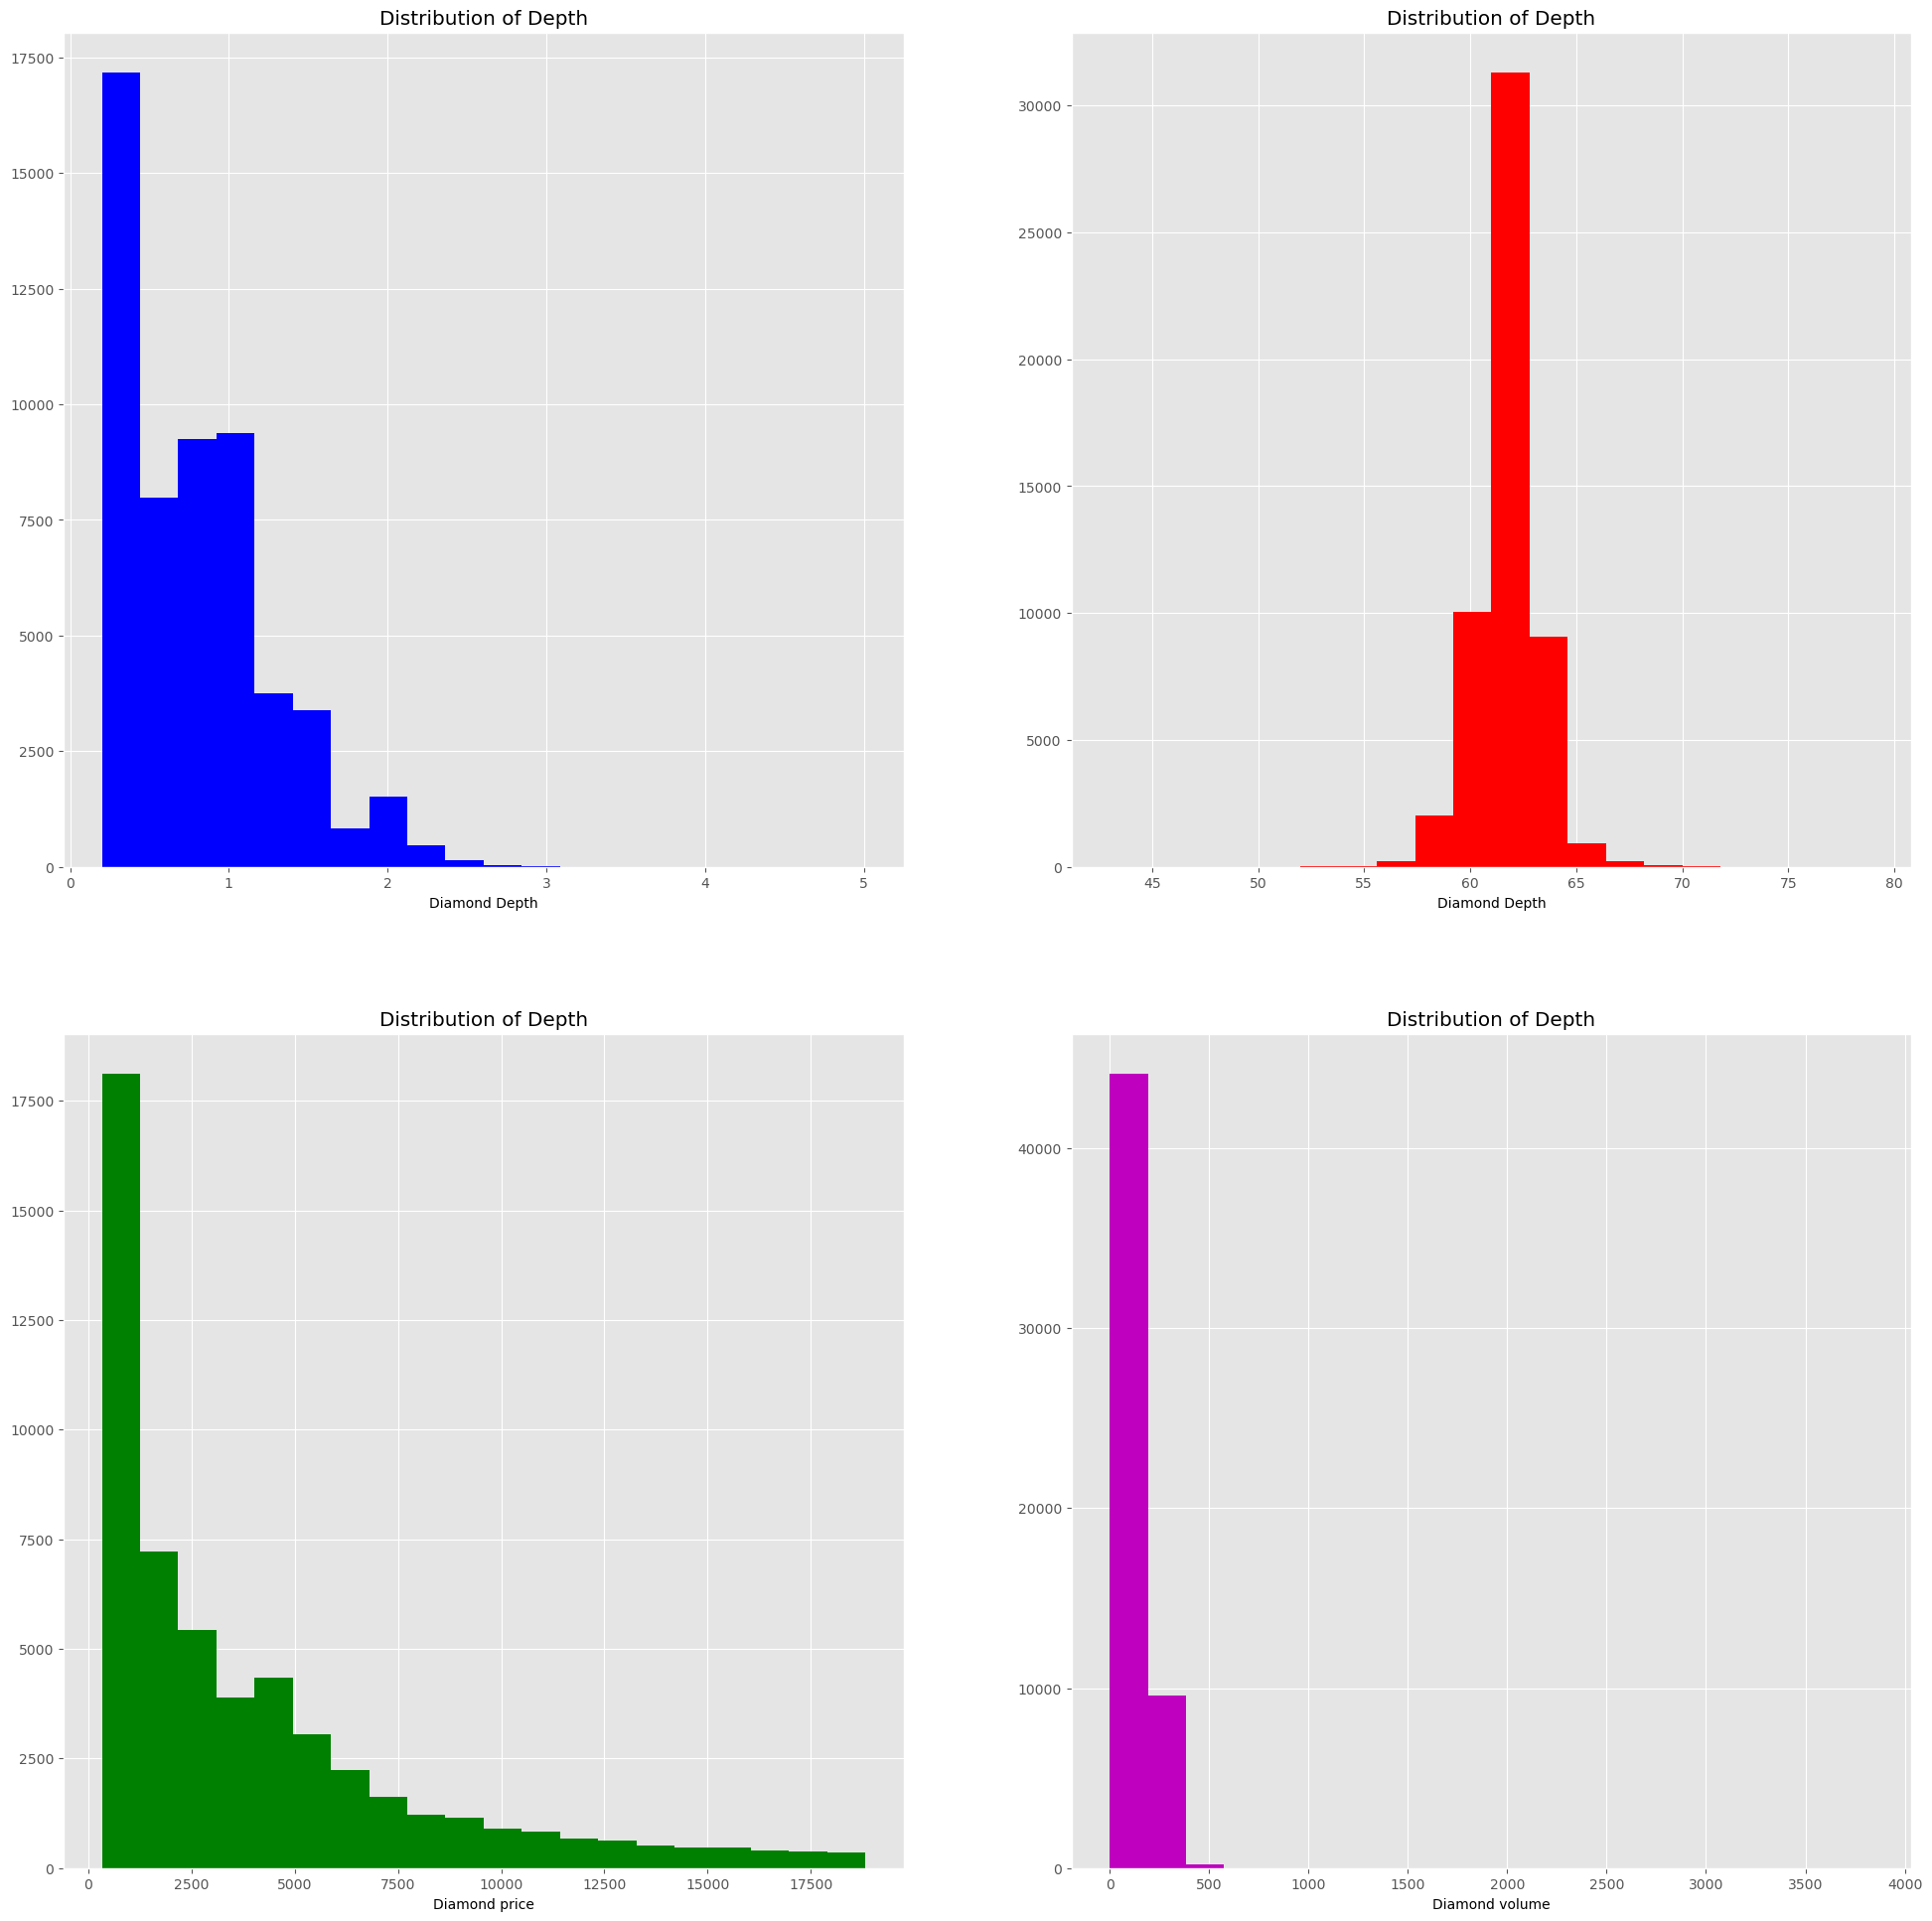

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=[24,24])

plt.subplot(221)
plt.hist(diamond['carat'],bins=20,color='b')
plt.xlabel('Diamond Depth')
plt.title('Distribution of Depth')

plt.subplot(222)
plt.hist(diamond['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution of Depth')

plt.subplot(223)
plt.hist(diamond['price'],bins=20,color='g')
plt.xlabel('Diamond price')
plt.title('Distribution of Depth')

plt.subplot(224)
plt.hist(diamond['volume'],bins=20,color='m')
plt.xlabel('Diamond volume')
plt.title('Distribution of Depth')

In [64]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(diamond['cut'],diamond[['volume','price','carat']],distr='logit')

In [65]:
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.369215
         Iterations: 36
         Function evaluations: 42
         Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Sun, 15 Oct 2023                                         
Time:                        17:47:37                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   5.31e-06      4.425      0.000    1.31e-05    3.39e-05
carat                -1.5407      0.286     -5.394      0.000      -2.100      -0.981
Fair/Good            -3.2836      0.031   -105.758      0.000      -3.344      -3.223
Good/Ideal            0.4038      0.015     27.062      0.000       0.375       0.433
Ideal/Very Good       0.7301      0.006    116.508      0.000       0.718       0.742
Very Good/Premium    -0.0055      0.008     -0.653      0.514      -0.022       0.011
=====================================================================================
"""

In [67]:
predicted = res_prob.model.predict(res_prob.params, exog=diamond[['volume','price','carat']])
predicted

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.03443606, 0.10308231, 0.42201809, 0.21495304, 0.2255105 ],
       [0.03468862, 0.10372996, 0.42298246, 0.21440769, 0.22419127],
       [0.03447851, 0.10319128, 0.42218114, 0.21486137, 0.2252877 ],
       ...,
       [0.03052062, 0.09285935, 0.40522189, 0.22335735, 0.2480408 ],
       [0.02973833, 0.0907751 , 0.40141256, 0.22500614, 0.25306787],
       [0.02970169, 0.09067712, 0.4012301 , 0.22508295, 0.25330815]])

In [71]:
res_prob = mod_prob.fit(method = 'bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.369215
         Iterations: 36
         Function evaluations: 42
         Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Sun, 15 Oct 2023                                         
Time:                        17:56:00                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   5.31e-06      4.425      0.000    1.31e-05    3.39e-05
carat                -1.5407      0.286     -5.394      0.000      -2.100      -0.981
Fair/Good            -3.2836      0.031   -105.758      0.000      -3.344      -3.223
Good/Ideal            0.4038      0.015     27.062      0.000       0.375       0.433
Ideal/Very Good       0.7301      0.006    116.508      0.000       0.718       0.742
Very Good/Premium    -0.0055      0.008     -0.653      0.514      -0.022       0.011
=====================================================================================
"""